## Data Analysis Process
### CSVs in Python

In [1]:
# enrollments = []
# f = open(enrollments_filename, 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

'''
Write code similar to the above to load the engagement
and submission data. Then print the first row of each
table to make sure that your code works.
'''


import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')


enrollments[0], daily_engagement[0], project_submissions[0]    



({u'account_key': u'448',
  u'cancel_date': u'2015-01-14',
  u'days_to_cancel': u'65',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-10',
  u'status': u'canceled'},
 {u'acct': u'0',
  u'lessons_completed': u'0.0',
  u'num_courses_visited': u'1.0',
  u'projects_completed': u'0.0',
  u'total_minutes_visited': u'11.6793745',
  u'utc_date': u'2015-01-09'},
 {u'account_key': u'256',
  u'assigned_rating': u'UNGRADED',
  u'completion_date': u'2015-01-16',
  u'creation_date': u'2015-01-14',
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'})

### Fixing Data Types

In [2]:
from datetime import datetime as dt
# Takes a date as a string, and returns a Python datetime object.
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(str(date), '%Y-%m-%d')
        
# Takes a string which is either an empty string or represents an integer,
    # and returns an int or None
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
    
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

### Investigating the Data

In [5]:
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

unique_students_enrollments = set()
for enrollment in enrollments:
    unique_students_enrollments.add(enrollment['account_key'])
print "Number of rows for enrollments table:", len(enrollments)
print "Number of unique students in enrollments table:", len(unique_students_enrollments)

unique_students_engagemenet = set()
for engagement in daily_engagement:
    unique_students_engagemenet.add(engagement['acct'])
print "\nNumber of rows for daily_engagement table:", len(daily_engagement)
print "Number of unique students in daily_engagement table:", len(unique_students_engagemenet)

unique_students_submissions = set()
for submission in project_submissions:
    unique_students_submissions.add(submission['account_key'])
print "\nNumber of rows for project_submissions table:", len(project_submissions)
print "Number of unique students in project_submissions table:", len(unique_students_submissions)



Number of rows for enrollments table: 1640
Number of unique students in enrollments table: 1302

Number of rows for daily_engagement table: 136240
Number of unique students in daily_engagement table: 1237

Number of rows for project_submissions table: 3642
Number of unique students in project_submissions table: 743


### Problem in the Data
Rename the 'acct' column to 'account_key' in the daily_engagemet table to match with other tables.

In [6]:
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del engagement['acct']

daily_engagement[0]['account_key']

u'0'

As the 'account_key' is matched across the tables, make the function to get the number of unique students.

In [7]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

## Check if the results match with what we found earlier.

if (len(get_unique_students(enrollments)) == len(unique_students_enrollments)) and (len(get_unique_students(daily_engagement)) == len(unique_students_engagemenet)):
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "All the results matches!"
    else:
        print "The results match for enrollments and daily_engagement but not for project_submissions"
        
elif (len(get_unique_students(enrollments)) == len(unique_students_enrollments)) and (len(get_unique_students(daily_engagement)) != len(unique_students_engagemenet)):
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "The results match for enrollments and project_submissions but not for daily_engagement"
    else:
        print "Only The result for enrollments matches"
    
elif (len(get_unique_students(enrollments)) != len(unique_students_enrollments)) and (len(get_unique_students(daily_engagement)) == len(unique_students_engagemenet)) :
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "The results match for daily_engagement and project_submissions but not for enrollments"
    else:
        print "Only The result for daily_engagement"
    
else:
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "Only The result for project_submissions"
    else:
        print "None of the results matches"
        



All the results matches!


### Missing Engagement Records
Why are students missing from daily_engagement?
First, identify surprising data points.

In [8]:
for enrollment in enrollments:
    student= enrollment['account_key']
    if student not in unique_students_engagemenet:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


We can see the join_date and cancel_date is the same, which would be most likely the reason why there is no record on engagement table.

### Checking for More Problem Records
How many enrollment records, that is not included in engagement table even though enrolled at least a day, are le

In [9]:
num_problem_records = 0
students = set()
for enrollment in enrollments:
    if (enrollment['days_to_cancel'] > 0) or enrollment['days_to_cancel'] == None:
        students = enrollment['account_key']
        if students not in unique_students_engagemenet:
            num_problem_records += 1
            print enrollment
num_problem_records
        

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

Here we can see all the problem accounts are test accounts, or is_udacity = True.
Since we do not data of test accounts for the analysis, we will remove all the data associated with test accounts for all the tables.

In [10]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
def remove_test_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
non_udacity_enrollments = remove_test_accounts(enrollments)
non_udacity_engagement = remove_test_accounts(daily_engagement)
non_udacity_submissions = remove_test_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


### Refining the Questions
The original question was:
* How do numbers in the daily engagement table differ for students who pass the first project?

However, the question is under-specified. To make it specific:

1. Exclude engagement records after the project submission
2. Match the lengths of time
3. Exclude the engagement in courses not related to the first project

To sum up,
* Only foucs on engagement from first week and exclude students who cancel within a week

To answer the question, we will begin with 
* create a dictionary of students who either:
    * haven't canceled yet
    * stayed enrolled more than a week


In [13]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
        
len(paid_students)

995

### Getting Data from First Week
Create a list of rows from the engagement table including only rows where the student is in paid_students, and the date is within one week of the student's join date.

In [14]:
## Given Function: ##
# Take a student's join date and the date of a specific engagement record
# and returns True if that engagement record happened within one week of the student joining

def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [15]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [16]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print "Number of rows in paid_enrollments:", len(paid_enrollments)
print "Number of rows in paid_engagement:",len(paid_engagement) 
print "Number of rows in paid_submissions:",len(paid_submissions)

Number of rows in paid_enrollments: 1293
Number of rows in paid_engagement: 134549
Number of rows in paid_submissions: 3618


In [17]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)
len(paid_engagement_in_first_week)

21508

### Exploring Student Engagement: Average Minutes Spent in Classroom

In [18]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
total_minutes_by_account = {}

for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
        total_minutes_by_account[account_key] = total_minutes

In [20]:
total_minutes = total_minutes_by_account.values()

import numpy as np

print "Mean: ", np.mean(total_minutes)
print "Standard Deviation: " , np.std(total_minutes)
print "Mimimum: ", np.min(total_minutes)
print "Maximum: ", np.max(total_minutes)

Mean:  647.590173826
Standard Deviation:  1129.27121042
Mimimum:  0.0
Maximum:  10568.1008673


### Debugging Data Analysis Code
From the above result, we can see the maximum minutes spent by one student in the first week was more than total minutes a week(24hr * 60mins * 7days = 1080minutes)
To identify the issue, first double-check the maximum minutes are correct manually.


In [21]:
max_minutes_student = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        student_with_max_mins = student
        max_minutes = total_minutes
        
print "Account key for the student with max minutes:",student_with_max_mins
print "Maximum Minutes:", max_minutes

Account key for the student with max minutes: 108
Maximum Minutes: 10568.1008673


Maximum minutes is correct.
Now check the all engagement records for this student.

In [22]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mins:
        print engagement_record

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 50.9938951667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 7, 0, 0)}
{u'lessons_completed': 5, u'num_courses_visited': 2, u'total_minutes_visited': 688.3034385, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 8, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 427.691757667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 3, u'total_minutes_visited': 165.6270925, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited

The list includes more than a week of engagement records for the student with maximum minutes. This implies that the given function, within_one_week, needs to be revised. The original function does not check the engagement date is after the join date, which cause the engagement records for students who rejoined could be included as engagement_date - join_date(to be specific, rejoin date) would be always negative.
To fix the issue, add 'time_delta.days >= 0' to the function.

In [23]:
def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and  time_delta.days < 7

Rerunn all codes associated with within_one_week function.

In [24]:
# Get number of engagement records in the first week for the paid students
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)
print "Number of engagement records in first week:",len(paid_engagement_in_first_week)


# Create dictionary of the first week engagement per paid account
# with format of {account_key:list of dictionaries for each engagement records}
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    

# Sum the total minutes spent in the first week per paid account
# with format of {account_key: total minutes}
total_minutes_by_account = {}

for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
        total_minutes_by_account[account_key] = total_minutes


# Create the summary of the total minutes spent in the first week per paid account,
# including average, standard deviation, mimimum, and maximum
total_minutes = total_minutes_by_account.values()

import numpy as np

print "Mean: ", np.mean(total_minutes)
print "Standard Deviation: " , np.std(total_minutes)
print "Mimimum: ", np.min(total_minutes)
print "Maximum: ", np.max(total_minutes)

Number of engagement records in first week: 6919
Mean:  306.708326753
Standard Deviation:  412.996933409
Mimimum:  0.0
Maximum:  3564.7332645


Double-check the number of engagement records for the student with maximum minutes is 7 or less.

In [25]:
for account, minutes in total_minutes_by_account.items():
    if minutes == np.max(total_minutes_by_account.values()):
        student_with_max_mins = account

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mins:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

### Lessons Completed in First Week
Adopt the code to analyze lessons completed instead of minutes spent, and find mean, standard deviation, minimum, and maximum of lessons completed by account.

In [26]:
# Create a function to group the data by a specific key
def group_data(data,key_name):
    group_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        group_data[key].append(data_point)
    return group_data

# Create a function to sum up a specific field
def sum_grouped_items(grouped_data,field_name):
    sum_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        sum_data[key] = total
    return sum_data
      
# Create a funciton to give summary of stats
def describe_data(data):
    print "Mean: ", np.mean(data)
    print "Standard Deviation: " , np.std(data)
    print "Mimimum: ", np.min(data)
    print "Maximum: ", np.max(data)

In [27]:
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
total_lessons = total_lessons_by_account.values()
print "Summary of Total Lessons Completed in First Week by Student"
describe_data(total_lessons)


Summary of Total Lessons Completed in First Week by Student
Mean:  1.63618090452
Standard Deviation:  3.00256129983
Mimimum:  0
Maximum:  36


### Number of Visits in the First Week
Analyze the number of days the students visited the classroom by creating field has_visted either 1 or 0, visitted or not-visited.

In [28]:
# Add 'has_visited" field
for engagement_data in paid_engagement:
    if engagement_data['num_courses_visited'] > 0:
        engagement_data['has_visited'] =1
    else:
        engagement_data['has_visited'] = 0

# Rerun some codes so that new column will be added
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)
        
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')      

# Sum by account
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(days_visited_by_account.values())


Mean:  2.86733668342
Standard Deviation:  2.25519800292
Mimimum:  0
Maximum:  7


### Splitting out Passing Students
Create two lists of engagement data for paid students in the first week.
The first list should contain data for students who eventually pass the first project (project keys is provided), and the second list should contain data for students who do not pass.

In [29]:
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

# List up account_key for the students who has passed the subway project
for submission_record in paid_submissions:
    if submission_record['lesson_key'] in subway_project_lesson_keys \
    and (submission_record['assigned_rating'] == "PASSED" or submission_record['assigned_rating'] == "DISTINCTION"):
        pass_subway_project.add(submission_record['account_key'])

# Split paid student engagement records in the first week into students who has passed the project and not
passing_engagement =[]
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print "Number of engagement records in first week \
for the students who passed the subway project:", len(passing_engagement)
print "Number of engagement records in first week \
for the students who did not pass the subway project:", len(non_passing_engagement)

Number of engagement records in first week for the students who passed the subway project: 4527
Number of engagement records in first week for the students who did not pass the subway project: 2392


### Comparing the Two Student Groups: Pass vs. Non-Pass

In [30]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [31]:
# Compare total minutes between two groups
passing_total_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
non_passing_total_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')

print "Passing Students Total Minutes Statistics"
describe_data(passing_total_minutes.values())
print"\nNon-Passing Students Total Minutes Statistics" 
describe_data(non_passing_total_minutes.values())

Passing Students Total Minutes Statistics
Mean:  394.586046484
Standard Deviation:  448.499519327
Mimimum:  0.0
Maximum:  3564.7332645

Non-Passing Students Total Minutes Statistics
Mean:  143.326474267
Standard Deviation:  269.538619011
Mimimum:  0.0
Maximum:  1768.52274933


In [32]:
# Compare total lessons completed between two groups
passing_total_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
non_passing_total_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')

print "Passing Students Total Completed-Lessons Statistics"
describe_data(passing_total_lessons.values())
print"\nNon-Passing Students Total Completed-Lessons Statistics" 
describe_data(non_passing_total_lessons.values())

Passing Students Total Completed-Lessons Statistics
Mean:  2.05255023184
Standard Deviation:  3.14222705558
Mimimum:  0
Maximum:  36

Non-Passing Students Total Completed-Lessons Statistics
Mean:  0.862068965517
Standard Deviation:  2.54915994183
Mimimum:  0
Maximum:  27


In [33]:
# Compare total days visted between two groups
passing_total_days_visited = sum_grouped_items(passing_engagement_by_account, 'has_visited')
non_passing_total_days_visited = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')

print "Passing Students Total Days Visited Statistics"
describe_data(passing_total_days_visited.values())
print"\nNon-Passing Students Total Days Visited Statistics" 
describe_data(non_passing_total_days_visited.values())

Passing Students Total Days Visited Statistics
Mean:  3.38485316847
Standard Deviation:  2.25882147092
Mimimum:  0
Maximum:  7

Non-Passing Students Total Days Visited Statistics
Mean:  1.90517241379
Standard Deviation:  1.90573144136
Mimimum:  0
Maximum:  7


### Making Histograms

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

def describe_data(data):
    print "Mean: ", np.mean(data)
    print "Standard Deviation: ", np.std(data)
    print "Minimum: ", np.min(data)
    print "Maximum: ", np.max(data)
    plt.hist(data, alpha = 0.6)

Mean:  394.586046484
Standard Deviation:  448.499519327
Minimum:  0.0
Maximum:  3564.7332645
Mean:  143.326474267
Standard Deviation:  269.538619011
Minimum:  0.0
Maximum:  1768.52274933


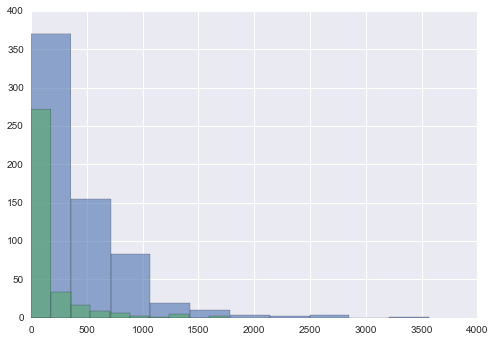

In [35]:
import seaborn as sns

describe_data(passing_total_minutes.values())
describe_data(non_passing_total_minutes.values())

### Further Findings

In [36]:
quitters = []
for enrollment in non_udacity_enrollments:
    if enrollment['is_udacity'] == False and enrollment['days_to_cancel'] > 7:
        quitters.append(enrollment)
len(quitters)

566

Mean:  93.2157303371
Standard Deviation:  57.6713137245
Minimum:  8
Maximum:  264


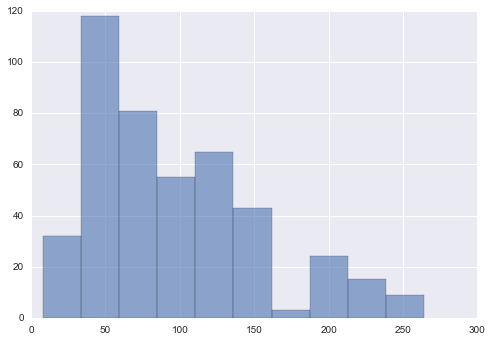

In [37]:
quitter = group_data(quitters,"account_key")
days_to_cancel_quitter = sum_grouped_items(quitter,"days_to_cancel")
describe_data(days_to_cancel_quitter.values())

In [38]:
canceled_after_trial = set()
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] > 7 and enrollment['is_udacity'] == False:
        canceled_after_trial.add(enrollment['account_key'])
len(canceled_after_trial)

445

In [39]:
quitter_engagement = []
for engagement_record in non_udacity_engagement:
    account_key = engagement_record['account_key']
    if account_key in canceled_after_trial:
        quitter_engagement.append(engagement_record)

Total Minutes: 
Mean:  2735.67872139
Standard Deviation:  3057.26361332
Minimum:  0.0
Maximum:  25114.2245857


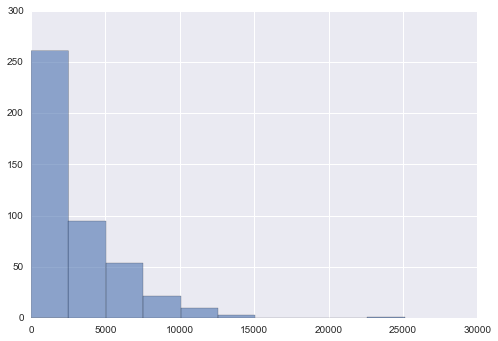

In [40]:
quitter_engagement_by_account = group_data(quitter_engagement,'account_key')

total_minutes_quitter = sum_grouped_items(quitter_engagement_by_account,"total_minutes_visited")

total_lessons_quitter = sum_grouped_items(quitter_engagement_by_account,"lessons_completed")

total_days_visited_quitter = sum_grouped_items(quitter_engagement_by_account,"has_visited")

print "Total Minutes: "
describe_data(total_minutes_quitter.values())

Total Lessons: 
Mean:  13.6426966292
Standard Deviation:  15.4531687427
Minimum:  0
Maximum:  65


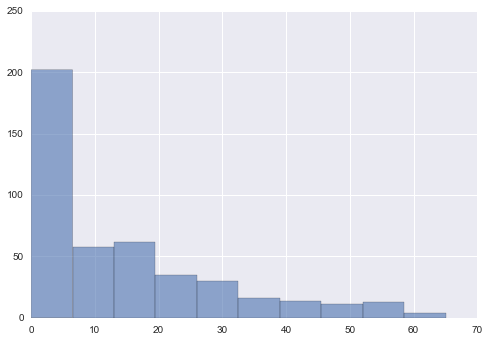

In [41]:
print "Total Lessons: "
describe_data(total_lessons_quitter.values())

Total Days Visited:
Mean:  30.7101123596
Standard Deviation:  30.2377695396
Minimum:  0
Maximum:  171


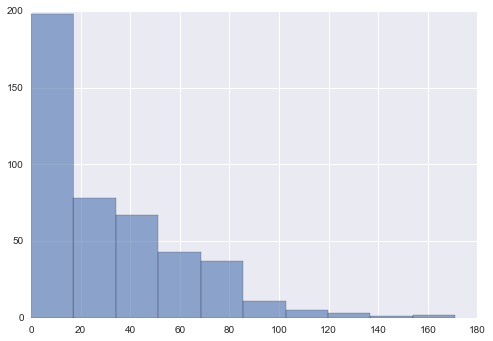

In [42]:
print "Total Days Visited:"
describe_data(total_days_visited_quitter.values())

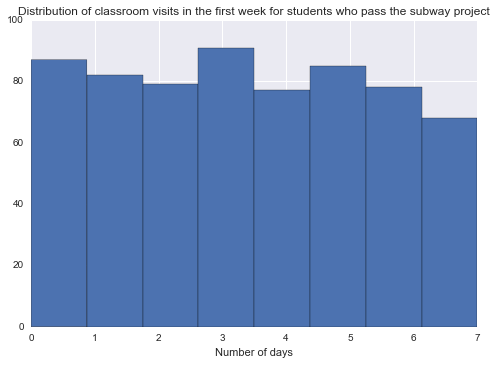

In [43]:
import seaborn as sns
plt.hist(passing_total_days_visited.values(),bins = 8)
plt.xlabel("Number of days")
plt.title("Distribution of classroom visits in the first week " + "for students who pass the subway project")